<a href="https://colab.research.google.com/github/ashfaqur0007/Image-Calssification-Project-using-CNN-Method/blob/main/Project_01_Dog_Vs_CatImage_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CNN network
# Dataset load
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip


In [ ]:
!unzip kagglecatsanddogs_5340.zip

In [3]:
input=[]
#cat label ==>0
#dog labl ==>1
label=[]
import os
for class_name in os.listdir("PetImages"):
  for image_path in os.listdir("PetImages/"+class_name):
    if class_name=="Cat":
      label.append(0)
    else:
      label.append(1)
    input.append(os.path.join("PetImages",class_name,image_path))
print(f'image name: {input[0]} ,label: {label[0]}')

image name: PetImages/Cat/11464.jpg ,label: 0


In [4]:
#dataset in a table form
import pandas as pd
df=pd.DataFrame()
df["image"]=input
df["label"]=label
df=df.sample(frac=1).reset_index(drop=True)
df

image  label
0      PetImages/Dog/12347.jpg      1
1       PetImages/Dog/4752.jpg      1
2       PetImages/Dog/6392.jpg      1
3       PetImages/Cat/5864.jpg      0
4       PetImages/Dog/3792.jpg      1
...                        ...    ...
24997  PetImages/Cat/12022.jpg      0
24998   PetImages/Dog/6316.jpg      1
24999   PetImages/Cat/4276.jpg      0
25000  PetImages/Cat/10204.jpg      0
25001   PetImages/Cat/9671.jpg      0

[25002 rows x 2 columns]

In [5]:
#image name
for name_test in df["image"]:
  if '.jpg' not in name_test:
    print(name_test)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [6]:
#image deletation /cleaning
import warnings
warnings.filterwarnings('ignore')
clean=[]
import PIL
from PIL import Image
for j in df["image"]:
  try:
    img=Image.open(j)
  except:
    clean.append(j)
clean

['PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/666.jpg']

In [7]:
df=df[df["image"]!='PetImages/Cat/Thumbs.db']
df=df[df["image"]!='PetImages/Dog/11702.jpg']
df=df[df["image"]!='PetImages/Cat/666.jpg']
df=df[df["image"]!='PetImages/Dog/Thumbs.db']
df

image  label
0      PetImages/Dog/12347.jpg      1
1       PetImages/Dog/4752.jpg      1
2       PetImages/Dog/6392.jpg      1
3       PetImages/Cat/5864.jpg      0
4       PetImages/Dog/3792.jpg      1
...                        ...    ...
24997  PetImages/Cat/12022.jpg      0
24998   PetImages/Dog/6316.jpg      1
24999   PetImages/Cat/4276.jpg      0
25000  PetImages/Cat/10204.jpg      0
25001   PetImages/Cat/9671.jpg      0

[24998 rows x 2 columns]

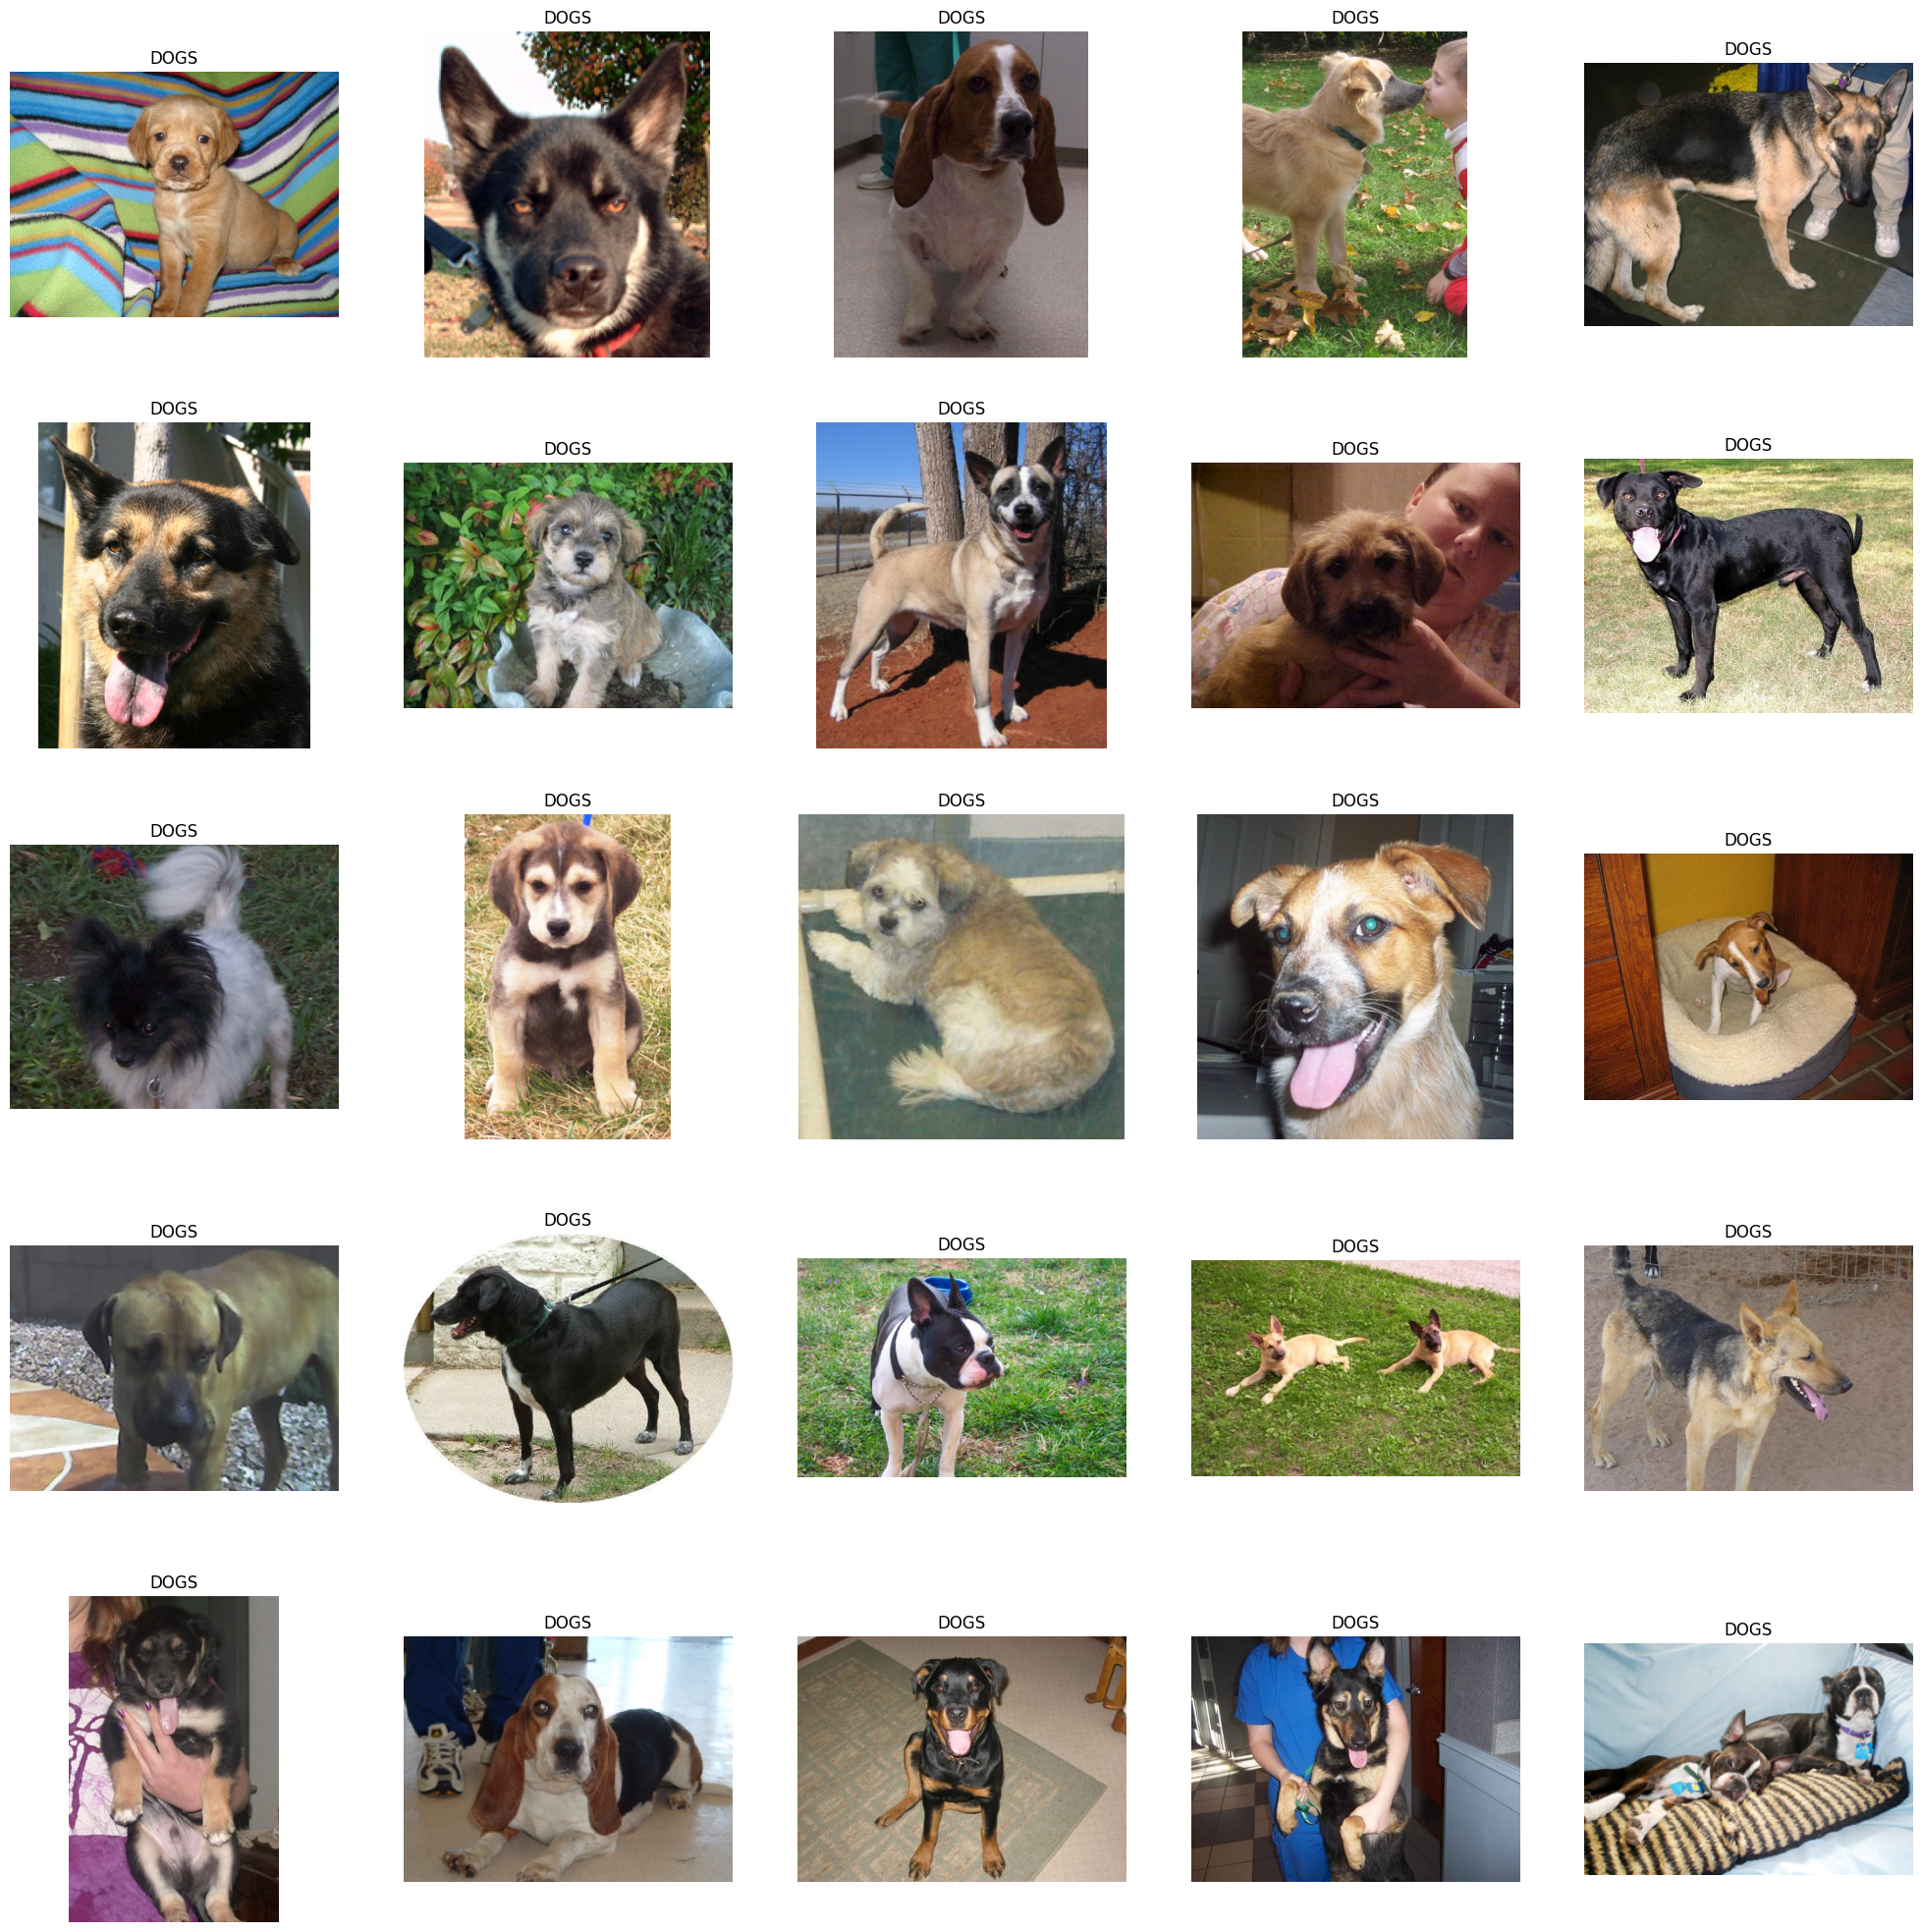

In [8]:
#EDA==>Exploratary Data Analysis
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
plt.figure(figsize=(25,25))
#generate random 25 images
import random
dog_image=df[df["label"]==1]["image"]# df[df["label"]==1] here label only 1 dog image path get for image we will get list of dog file path
start=random.randint(0,len(dog_image))
files=dog_image[start:start+25]
for index,dog_image in enumerate(files):
  plt.subplot(5,5,index+1)#subplot ==> no of rows ,no columns
  img_dog=load_img(dog_image)
  plt.imshow(img_dog)
  plt.axis("off")
  plt.title("DOGS")

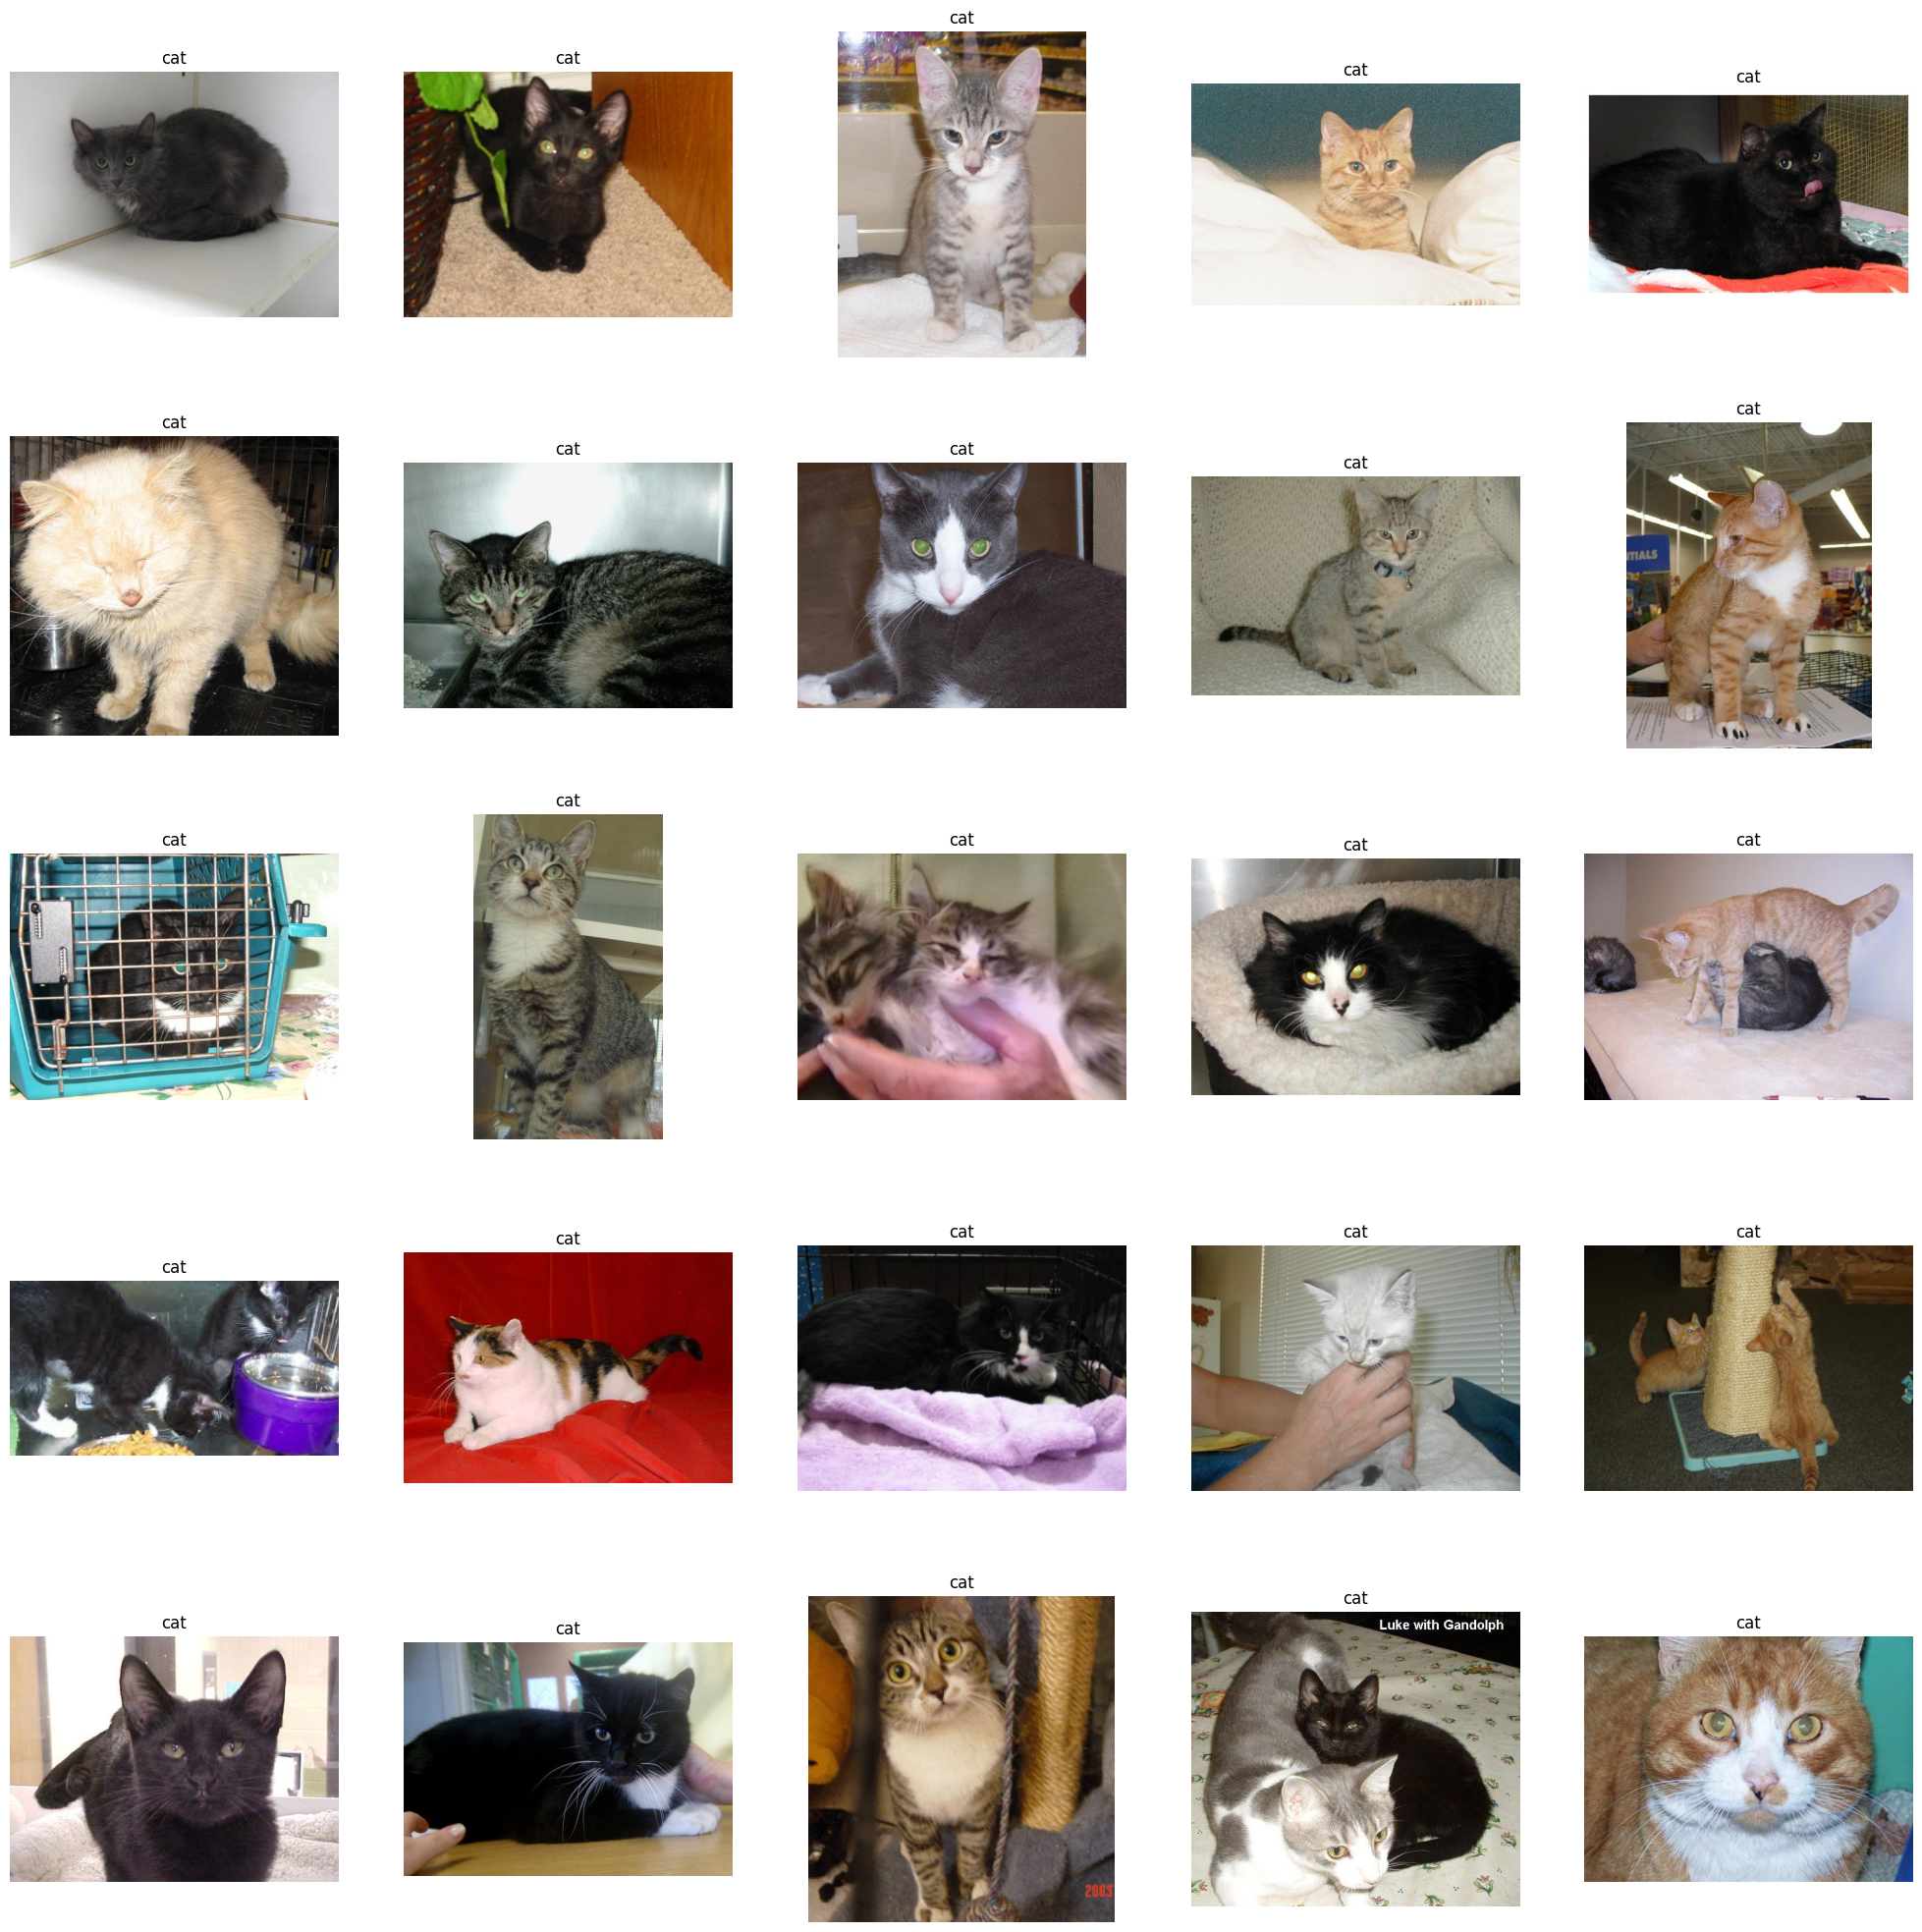

In [9]:
#cat Eda
plt.figure(figsize=(25,25))
cat_image=df[df["label"]==0]["image"]#image path for cat
start=random.randint(0,len(cat_image))
files=cat_image[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  plt.imshow(load_img(file))
  plt.title("cat")
  plt.axis("off")


In [10]:
#Data Generator
df["label"]=df["label"].astype('str')

In [11]:
#train test split
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42)
print(train.shape)
print(test.shape)

(19998, 2)
(5000, 2)


In [12]:
#augmentation and normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#ImageDataGenrator here is all the value of range
train_generator=ImageDataGenerator(
    rescale=1./255,#normalization
    rotation_range=40,#augmentation
    shear_range=0.02,
    zoom_range=0.02,
    horizontal_flip=True,
)
val_generator=ImageDataGenerator(rescale=1./255)#validation image there is no augmentation

#iterator train iterator and test iterator
train_iterator=train_generator.flow_from_dataframe(
    train,
    x_col='image',
    y_col='label',
    target_size=(128,128),#image target
    #image size convert
    batch_size=1000,
    class_mode="binary"
)
val_iterator=val_generator.flow_from_dataframe(
    test,
    x_col='image',
    y_col='label',
    target_size=(128,128),
    batch_size=1000,
    class_mode='binary'
)


Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [13]:
# CNN model
#dl model
from keras import Sequential #layer create
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten
#model
model=Sequential([Conv2D(16,(3,3),activation="relu",input_shape=(128,128,3)),# 126*126*16
    MaxPool2D((2,2)) , #63*63*16
    Conv2D(32,(3,3)),#61*61*32
    MaxPool2D((2,2)),#30*30
    Conv2D(64,(3,3)),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation="sigmoid")]
)

In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history=model.fit(train_iterator,epochs=10,validation_data=val_iterator)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.5056 - loss: 1.5055 - val_accuracy: 0.5110 - val_loss: 0.6858
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 114s 6s/step - accuracy: 0.5796 - loss: 0.6693 - val_accuracy: 0.6210 - val_loss: 0.6458
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 114s 6s/step - accuracy: 0.6163 - loss: 0.6486 - val_accuracy: 0.6424 - val_loss: 0.6313
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 114s 6s/step - accuracy: 0.6499 - loss: 0.6272 - val_accuracy: 0.6592 - val_loss: 0.6111
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.6394 - loss: 0.6286 - val_accuracy: 0.6422 - val_loss: 0.6238
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.6686 - loss: 0.6058 - val_accuracy: 0.6928 - val_loss: 0.5826
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 111s 6s/step - accuracy: 0.6902 - loss: 0.5879 - val_accuracy: 0.6958 - val_loss: 0.5754
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 111s 6s/step - accuracy: 0.7030 - loss: 0.5720 - val_accuracy: 0.7204 - v

In [16]:
acc=history.history['accuracy']
x=range(len(acc))
val_acc=history.history['val_accuracy']
plt.plot(x,acc,'b',label="training accuracy")
plt.plot(x,val_acc,'r',label="Valid accuracy")
plt.title("train vs valid accuracy")
plt.legend()
plt.figure()

loss_data=history.history["loss"]
val_loss_data=history.history["val_loss"]
plt.plot(x,loss_data,'b',label="loss")
plt.plot(x,val_loss_data,'r',label="validation loss")
plt.title("loss vs validation loss")
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_path = "/content/drive/MyDrive/Dataset/test.jpg"
img = load_img(image_path, target_size=(128, 128))
img = img_to_array(img)
img = img / 255.0
img = img.reshape(1, 128, 128, 3)
predict = model.predict(img)

if predict[0] > 0.5:
    print("It's a dog")
else:
    print("It's a cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
It's a cat
